# <center>K-Means Clustering to increase bank revenue</center>

### Table of Contents
1.	[Case Study Description](#section1)
2.	[Import the Dataset](#section2)
3.	[Exploratory Data Analysis](#section3)
4.	[Preprocessing the Data for building K-Means Clustering Model](#section4)
5.	[Elbow Method](#section5)
6.	[Making inferences about each Cluster](#section6)

<a id=section1></a>

### 1. Case Study Description

**This case is about a bank which has a growing customer base.The management wants to explore ways to improve its revenue using a machine learning model. This has encouraged the retail marketing department to devise campaigns to do better targeted marketing.**

**The department wants to build a model that will help them identify characteristics of groups of customers. This will increase their revenu while at the same time reduce the cost of the campaign.**


#### Dataset Description:
 - ID: Customer ID
 - Age: Customer's age in completed years
 - Experience: #years of professional experience
 - Income Annual: income of the customer (USD 1000)
 - ZIPCode: Home Address ZIP code.
 - Family: Family size of the customer
 - CCAvg Avg: spending on credit cards per month (USD 1000)
 - Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
 - Mortgage: Value of house mortgage if any. (USD 1000)
 - Personal Loan: Did this customer accept the personal loan offered in the last campaign?
 - Securities Account: Does the customer have a securities account with the bank?
 - CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
 - Online: Does the customer use internet banking facilities?
 - CreditCard: Does the customer uses a credit card issued by UniversalBank?

#### Objectives:

 - **Cluster customers into segments using K-Means Clustering Algorithm.**
 - **Identify properties of each cluster semgent.**
 - **Propose actions for each cluster that help will the Bank increase its revenue with a minimal budget.**

#### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id=section2></a>

#### 2. Import the Dataset

In [2]:
bank = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/abc_bank.csv')

#### Chechk no.of rows and columns

In [3]:
bank.shape

(5000, 14)

#### Inspect the Dataset

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Check presence of null values

In [5]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Column names

In [8]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#### Drop unnecessary columns ID and ZIP Code

In [9]:
bank_1 = bank.drop(['ID','ZIP Code'], axis = 1)

#### Dataset after dropping unnecessary columns

In [10]:
bank_1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### Continous Features and Categorical Features

In [11]:
continous_features = ['Age','Experience','Income','CCAvg','Mortgage']

categorical_features = ['Family','Education','Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']

<a id=section3></a>

### 3. Exploratory Data Analysis

In [12]:
bank_1[continous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


#### Distributions of Continous Variables

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


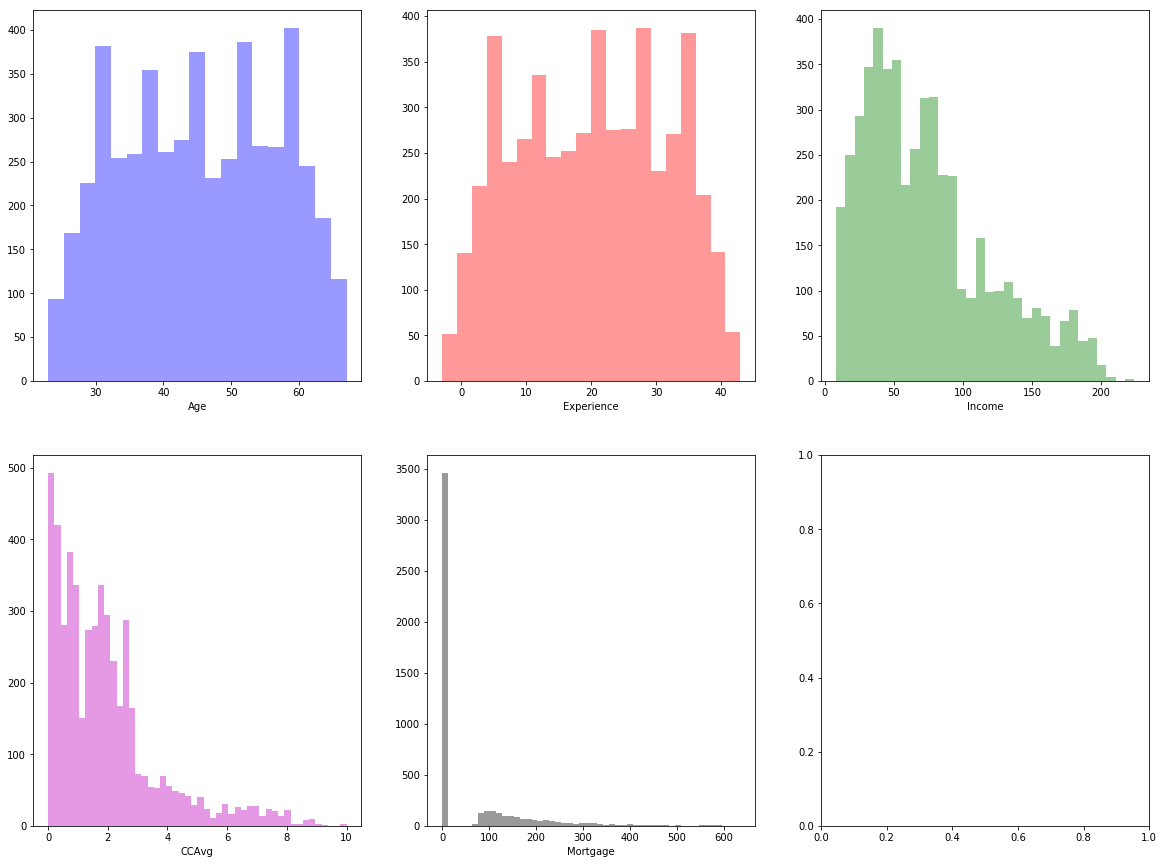

In [13]:
f, axes = plt.subplots(2, 3, figsize=(20, 15))

sns.distplot(bank_1.Age, color="b", ax=axes[0, 0],kde = False)

sns.distplot(bank_1.Experience, color="r", ax=axes[0, 1],kde = False)

sns.distplot(bank_1.Income, color="g", ax=axes[0, 2],kde = False)

sns.distplot(bank_1.CCAvg, color="m", ax=axes[1, 0],kde = False)

sns.distplot(bank_1.Mortgage, color="k", ax=axes[1, 1],kde = False)

#### Family Size Distribution

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


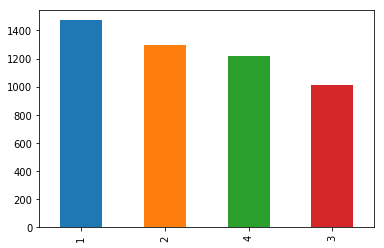

In [14]:
print(bank_1.Family.value_counts())
bank_1.Family.value_counts().plot(kind = 'bar')

#### Education Level Distribution

1    2096
3    1501
2    1403
Name: Education, dtype: int64


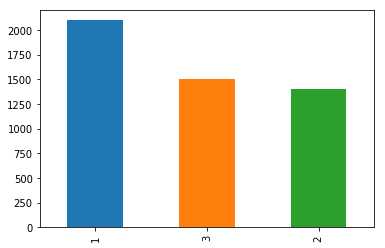

In [15]:
print(bank_1.Education.value_counts())
bank_1.Education.value_counts().plot(kind = 'bar')

#### Personal Loan distribution

0    4520
1     480
Name: Personal Loan, dtype: int64


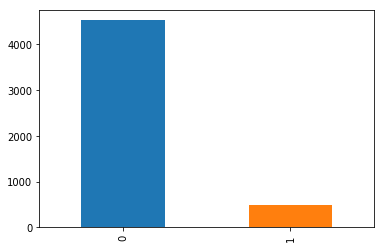

In [16]:
print(bank_1['Personal Loan'].value_counts())
bank_1['Personal Loan'].value_counts().plot(kind = 'bar',)

#### Income distribution among customers not having loan and having loan

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


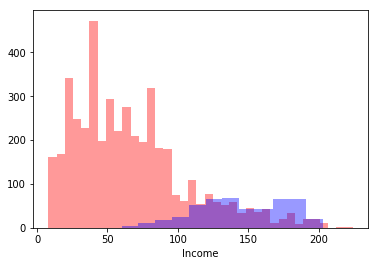

In [17]:
sns.distplot(bank_1[bank_1['Personal Loan'] == 0]['Income'], kde=False,color = 'r')
sns.distplot(bank_1[bank_1['Personal Loan'] == 1]['Income'], kde=False,color = 'b')

#### Experience distribution among customers not having loan and having loan

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


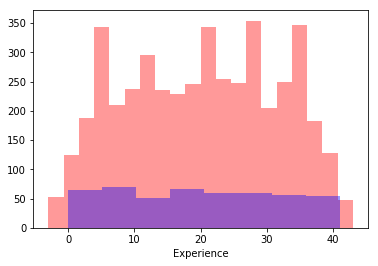

In [18]:
sns.distplot(bank_1[bank_1['Personal Loan'] == 0]['Experience'], kde=False,color = 'r')
sns.distplot(bank_1[bank_1['Personal Loan'] == 1]['Experience'], kde=False,color = 'b')

#### Correlation Matrix for continous features

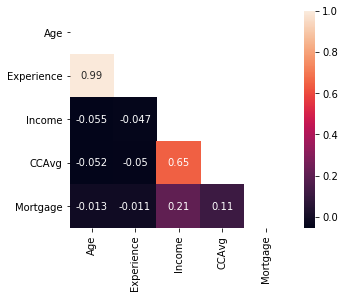

In [19]:
cor_matrix = bank_1[continous_features].corr()

mask = np.zeros_like(cor_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor_matrix,annot = True,square = True,mask = mask)

<a id=section4></a>

### 4. Preprocessing the Data for building K-Means Clustering Model

#### Convert categorical data from numeric data type to string data type for one-hot encoding

In [20]:
bank_1.Family = bank_1.Family.astype('str')

In [21]:
bank_1.Education = bank_1.Education.astype('str')

#### Other categorical columns like 'Personal Loan', 'Securities Account','CD Account', 'Online' are 'CreditCard' already in one-hot encoded format.

#### Generate one-hot encoding for categorical data.

In [22]:
bank_1 = pd.get_dummies(bank_1,drop_first = True)

In [23]:
bank_1.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,1,1,0


#### To perform K-Means Clustering, we need to bring all the variables to common scale.
#### We will use MinMaxSCaler for this purpose

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
min_max_scaler = scaler.fit(bank_1)
scaled_data = pd.DataFrame(min_max_scaler.transform(bank_1))

In [27]:
scaled_data.columns = bank_1.columns

In [28]:
scaled_data.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.045455,0.086957,0.189815,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.272727,0.239130,0.171296,0.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


<a id=section5></a>

### 5. Elbow Method
After normalization, we need to choose the optimal number of clusters so as to get a good within cluster score.To achieve that we iterate through different K values and plot the total within cluster distances for each K value. We choose the K value that causes a sharp drop in total within cluster distance. This drop often resembles an "Elbow".

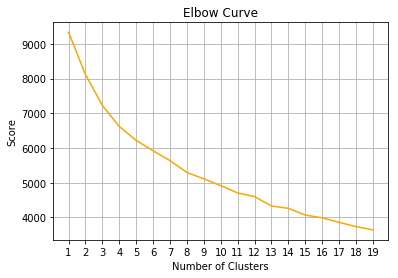

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
number_of_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))]
plt.plot((number_of_clusters),score,color = 'orange')
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid()
plt.show()

The "elbow" is located at K = 4

#### We will create a clustering model with no.of cluster centers = 4

In [30]:
clusters = KMeans(n_clusters=4,max_iter=1000,random_state=42)

In [31]:
clusters.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#### Sum of squared distances of samples to their closest cluster center.

In [32]:
clusters.inertia_

6617.823131389774

#### Assigning each point to its respective cluster in the dataframe

In [35]:
bank_1['labels'] = clusters.labels_

In [34]:
scaled_data['labels'] = clusters.labels_

In [36]:
bank_1.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,labels
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0,3
1,45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0,1
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0,3
4,35,8,45,1.0,0,0,0,0,0,1,0,0,1,1,0,3


#### No.of points in each cluster

In [37]:
import numpy as np
size_of_each_cluster = bank_1.groupby('labels').size().reset_index()
size_of_each_cluster.columns = ['labels','number_of_points']
size_of_each_cluster['percentage'] = size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points'])

print(size_of_each_cluster)

   labels  number_of_points  percentage
0       0              1600      0.3200
1       1              1010      0.2020
2       2              1223      0.2446
3       3              1167      0.2334


#### Retrieve the cordinates of cluster centers

In [38]:
cluster_centers = pd.DataFrame(clusters.cluster_centers_)

In [39]:
cluster_centers.columns = bank_1.columns[:-1]

#### Setting display format

In [40]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Cluster Centers

In [41]:
cluster_centers

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.498,0.499,0.398,0.247,0.099,0.039,0.099,0.046,0.587,0.296,0.576,0.000,0.000,0.166,-0.000
1,0.526,0.515,0.273,0.170,0.084,0.132,0.105,0.081,0.605,0.288,0.000,1.000,-0.000,0.379,0.275
2,0.517,0.503,0.265,0.174,0.085,0.128,0.096,0.056,0.570,0.282,0.306,0.000,0.312,0.000,1.000
3,0.495,0.495,0.245,0.162,0.083,0.110,0.121,0.067,0.631,0.308,-0.000,0.000,0.721,0.647,-0.000


<a id=section6></a>

### 6. Making inferences about each Cluster

#### Cluster 0

 - **Age and Experinece is less** as compared to Cluster 1 and Cluster 2, but **this cluster has highest average income.**<br/>
 - **CCAvg is also high.** 
 - So, **we can offer them lucrative credit card schemes.**
 <br/>
 - Most of the customers did not accept a personal loan offer.
 - So, it is a waste of time pursuing customers to take a loan.

The above observations can be seen in the visualizations as well

 - Distribution of Age for each Cluster

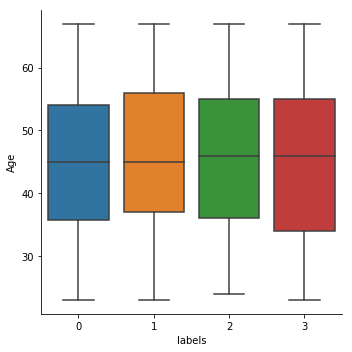

In [42]:
sns.catplot(x = 'labels', y = 'Age',kind = 'box',data = bank_1)

 - Distribution of Income for each Cluster

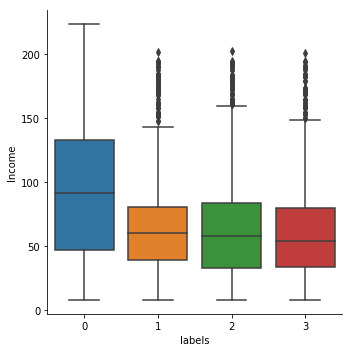

In [43]:
sns.catplot(x = 'labels', y = 'Income',kind = 'box',data = bank_1)

 - Distribution of CCAvg for each Cluster

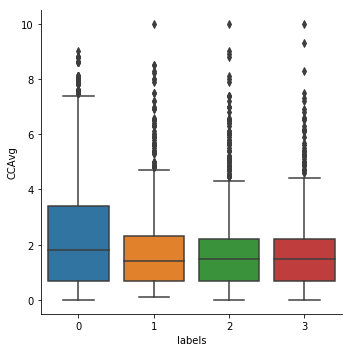

In [44]:
sns.catplot(x = 'labels', y = 'CCAvg',kind = 'box',data = bank_1)

#### Cluster 1 and Cluster 2

In [45]:
cluster_centers

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.498,0.499,0.398,0.247,0.099,0.039,0.099,0.046,0.587,0.296,0.576,0.000,0.000,0.166,-0.000
1,0.526,0.515,0.273,0.170,0.084,0.132,0.105,0.081,0.605,0.288,0.000,1.000,-0.000,0.379,0.275
2,0.517,0.503,0.265,0.174,0.085,0.128,0.096,0.056,0.570,0.282,0.306,0.000,0.312,0.000,1.000
3,0.495,0.495,0.245,0.162,0.083,0.110,0.121,0.067,0.631,0.308,-0.000,0.000,0.721,0.647,-0.000


 - **Customers who accepted a personal loan offer mostly belong to these clusters.**<br/>

We can see this evidently in the below result.

In [46]:
bank_1[bank_1['Personal Loan'] == 1].groupby(['labels'])['Personal Loan'].count()

labels
0     63
1    133
2    156
3    128
Name: Personal Loan, dtype: int64

 - Their **income is better than Cluster 3.**
 - So we can **run a campaign to pursue other customers in these clusters to take a loan** so that the **Bank can earn money through interest.**

#### Cluster 3<br/>

 - **Age is less<br/>**
 - **Experience is less<br/>**
 - **Income is less<br/>**
 - **Family sizie is high<br/>**
 - Some customers in this cluster **also accepted personal loan offer.** Be **proactive in collecting the laon amount from these customers.**